In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

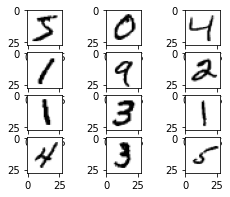

In [5]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [6]:
X_train.shape[0]

60000

In [7]:
X_test.shape[0]

10000

In [8]:
#Girdi boyutunu Keras'a göre ayarlama
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
#Keras modelimizi oluşturuyoruz
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [12]:
model.compile(
      optimizer = "adam",
      loss = "categorical_crossentropy",
      metrics = ["accuracy"]
)

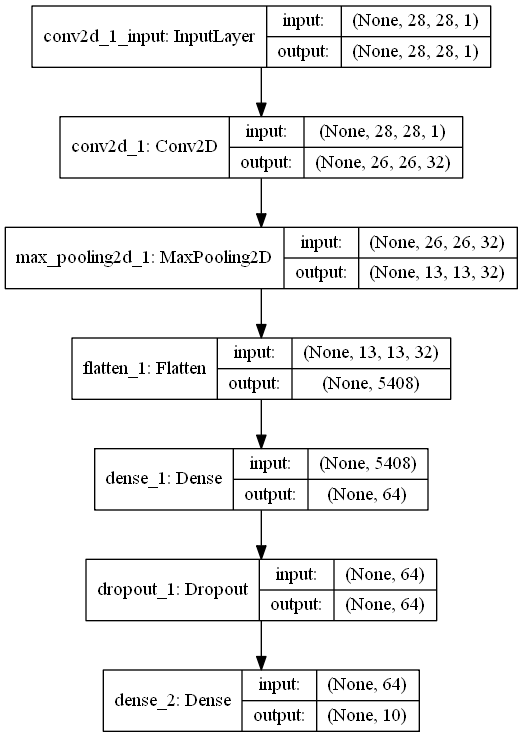

In [13]:
tf.keras.utils.plot_model(model, "EcodationAIGroup6.png", show_shapes = True, show_layer_names = True)

In [14]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2, #0, 1 - [===============], 2 -> Epoch 1/5
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 40s - loss: 0.3542 - accuracy: 0.8928 - val_loss: 0.1135 - val_accuracy: 0.9671
Epoch 2/5
 - 36s - loss: 0.1658 - accuracy: 0.9497 - val_loss: 0.0838 - val_accuracy: 0.9766
Epoch 3/5
 - 37s - loss: 0.1303 - accuracy: 0.9606 - val_loss: 0.0735 - val_accuracy: 0.9791
Epoch 4/5
 - 37s - loss: 0.1077 - accuracy: 0.9664 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 5/5
 - 37s - loss: 0.0985 - accuracy: 0.9691 - val_loss: 0.0667 - val_accuracy: 0.9822


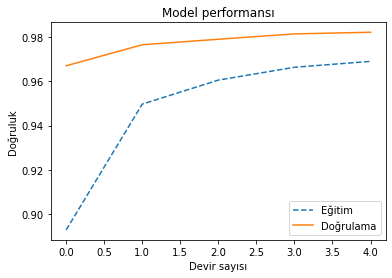

In [15]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

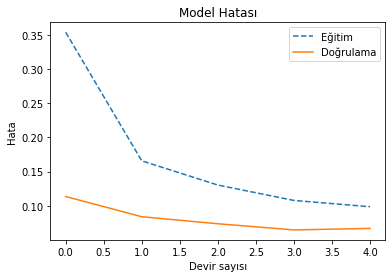

In [16]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [17]:
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test verisiyle model doğruluğu : %.2f" % (score[1] * 100))

Test verisiyle model doğruluğu : 98.20
